# นำข้อมูลเข้า และ Clean ข้อมูล

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving AGB_Data.xlsx to AGB_Data (5).xlsx
User uploaded file "AGB_Data (5).xlsx" with length 11978 bytes


In [ ]:
import pandas as pd

file_path = "AGB_Data.xlsx"
df = pd.read_excel(file_path)

print("🔹 ข้อมูล 5 แถวแรก:")
print(df.head())

print("\n🔹 ข้อมูลเบื้องต้น (info):")
print(df.info())

🔹 ข้อมูล 5 แถวแรก:
    NDVI  TNDVI     SR   SAVI  MSAVI2        AGB
0 -0.072  0.654  0.866 -0.108  -0.154   7.158685
1 -0.072  0.654  0.866 -0.108  -0.154  12.112405
2 -0.056  0.666  0.894 -0.084  -0.118  21.010835
3 -0.048  0.672  0.908 -0.072  -0.101  24.553987
4 -0.041  0.678  0.922 -0.061  -0.084  25.799105

🔹 ข้อมูลเบื้องต้น (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NDVI    55 non-null     float64
 1   TNDVI   55 non-null     float64
 2   SR      55 non-null     float64
 3   SAVI    55 non-null     float64
 4   MSAVI2  55 non-null     float64
 5   AGB     55 non-null     float64
dtypes: float64(6)
memory usage: 2.7 KB
None


# วิเคราะห์การกระจายของข้อมูล

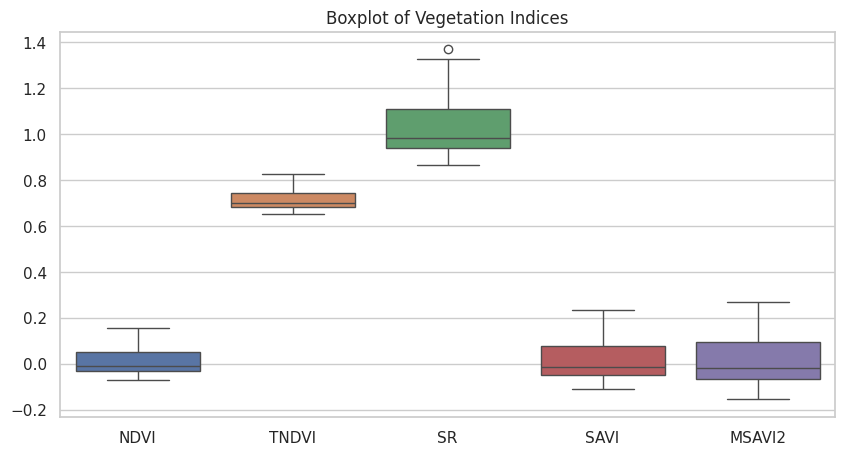

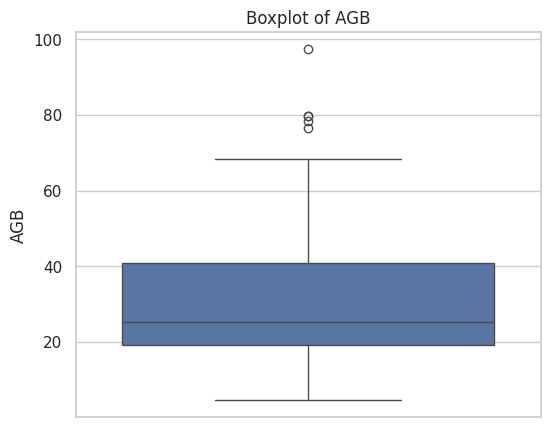

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Boxplot ดัชนีพืชพรรณ 5 ตัว
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['NDVI', 'TNDVI', 'SR', 'SAVI', 'MSAVI2']])
plt.title('Boxplot of Vegetation Indices')
plt.show()

#Boxplot ของ AGB แยกต่างหาก
plt.figure(figsize=(6, 5))
sns.boxplot(data=df['AGB'])
plt.title('Boxplot of AGB')
plt.show()

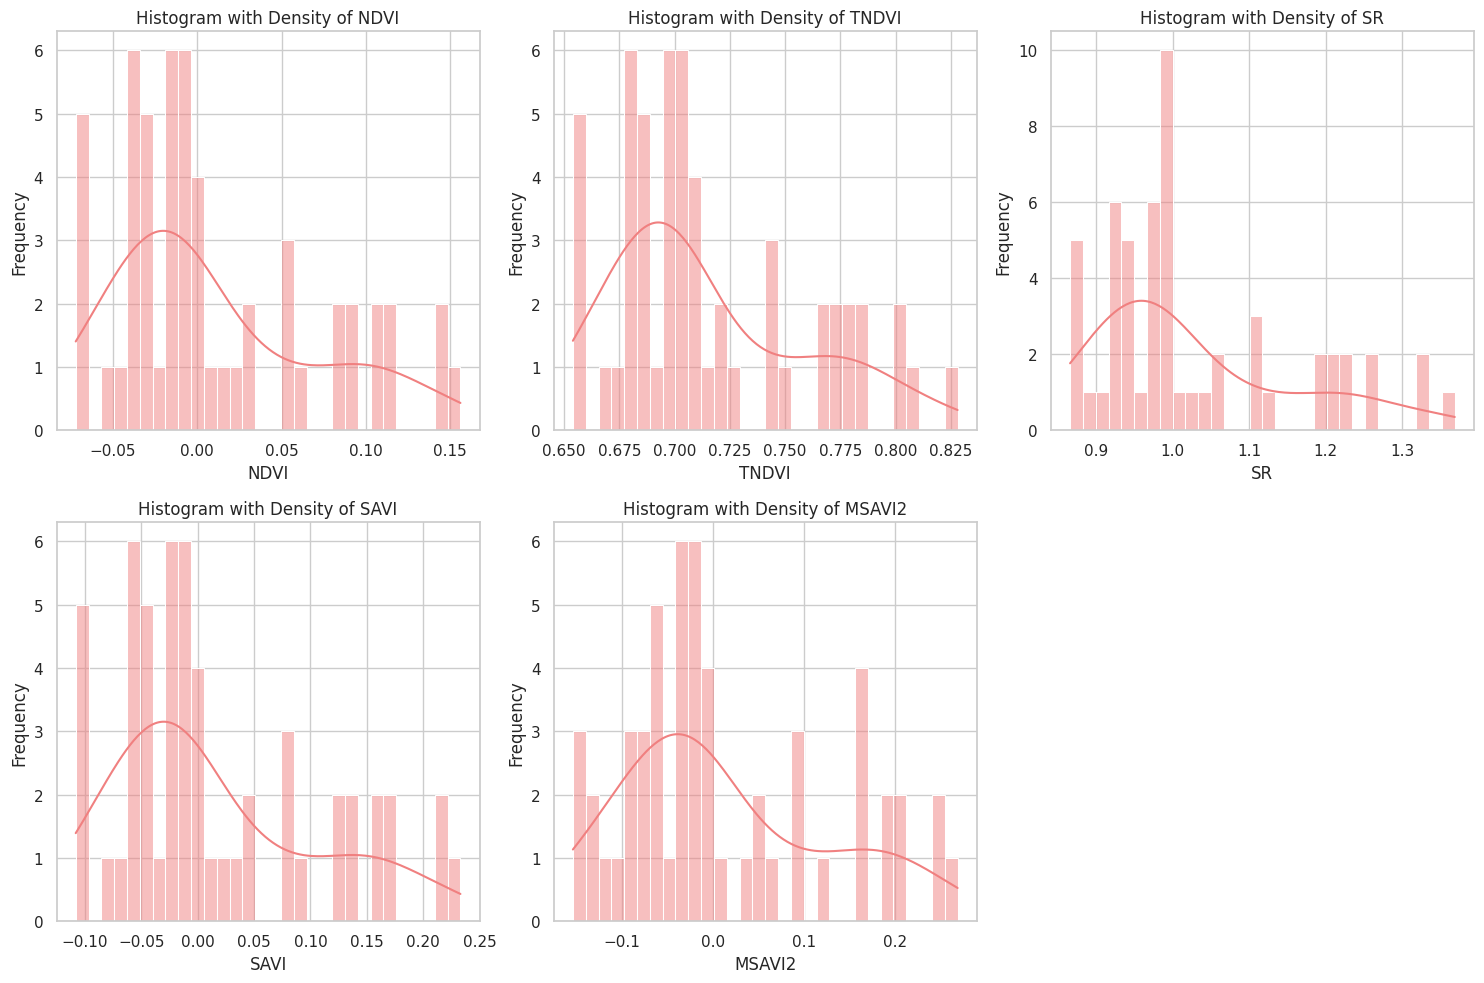

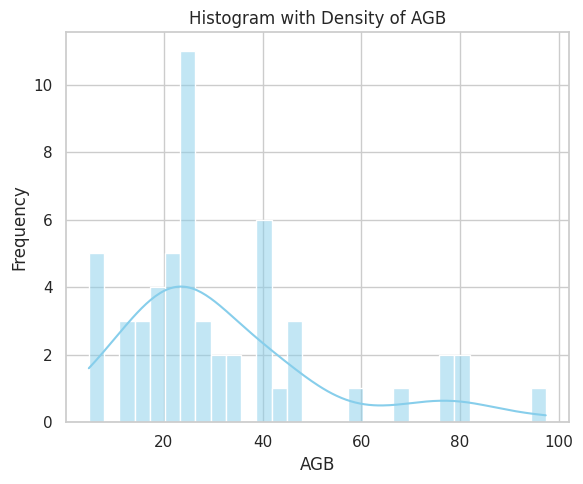

In [ ]:
features = ["NDVI", "TNDVI", "SR", "SAVI", "MSAVI2"]

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[feature], kde=True, color='lightcoral', edgecolor='white', bins=30)
    plt.title(f"Histogram with Density of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
sns.histplot(df["AGB"], kde=True, color='skyblue', edgecolor='white', bins=30)
plt.title("Histogram with Density of AGB")
plt.xlabel("AGB")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

**แปลงข้อมูล**

# ทดสอบการแจกแจงแบบปกติของ Y

In [ ]:
from scipy.stats import shapiro
import numpy as np

# สมมุติว่า y คือ AGB ดั้งเดิม
y = df['AGB']

# แปลง AGB ในหลายแบบ
transforms = {
    'log': np.log(y + 1),
    'log10': np.log10(y + 1),
    'sqrt': np.sqrt(y),
    'cbrt': np.cbrt(y),
    'inverse': 1 / (y + 1),
    'square': y ** 2
}

# ทดสอบความเป็นปกติ
print("ผลการทดสอบ Shapiro-Wilk (p-value > 0.05 = ผ่าน):\n")
for name, transformed_y in transforms.items():
    stat, p = shapiro(transformed_y)
    result = "✅ ผ่าน" if p > 0.05 else "❌ ไม่ผ่าน"
    print(f"{name:<8} | p-value = {p:.4f} | {result}")

ผลการทดสอบ Shapiro-Wilk (p-value > 0.05 = ผ่าน):

log      | p-value = 0.1685 | ✅ ผ่าน
log10    | p-value = 0.1685 | ✅ ผ่าน
sqrt     | p-value = 0.0260 | ❌ ไม่ผ่าน
cbrt     | p-value = 0.1341 | ✅ ผ่าน
inverse  | p-value = 0.0000 | ❌ ไม่ผ่าน
square   | p-value = 0.0000 | ❌ ไม่ผ่าน


In [ ]:
import numpy as np

# แปลง AGB
df['AGB_cuberoot'] = np.cbrt(df['AGB'])     # cube root
df['AGB_log'] = np.log(df['AGB'])     # log
df['AGB_log10'] = np.log10(df['AGB'])     # log10

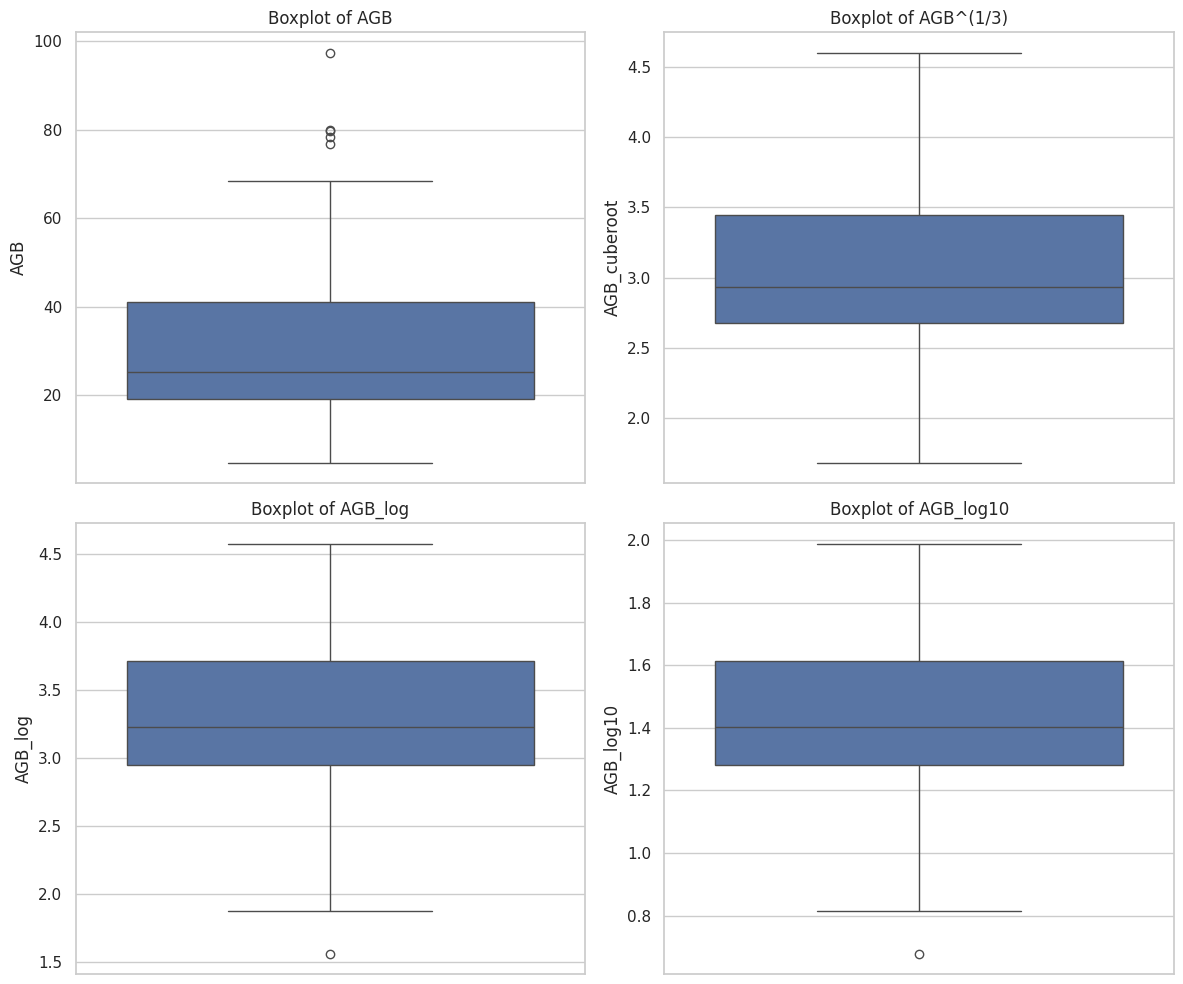

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# สร้าง figure และ subplots แบบ 2x2 (สำหรับ 4 กราฟ)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten() # ทำให้ axes เป็น array 1 มิติ เพื่อเข้าถึงง่ายขึ้น

# รายชื่อตัวแปรที่ต้องการ plot
variables_to_plot = ["AGB", "AGB_cuberoot", "AGB_log", "AGB_log10"]
titles = ["Boxplot of AGB", "Boxplot of AGB^(1/3)", "Boxplot of AGB_log", "Boxplot of AGB_log10"]

# วาด Boxplot สำหรับแต่ละตัวแปรใน subplot ที่แตกต่างกัน
for i, var in enumerate(variables_to_plot):
    sns.boxplot(y=df[var], ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_ylabel(var) # กำหนดชื่อแกน y เป็นชื่อตัวแปร

plt.tight_layout() # ปรับระยะห่างระหว่าง subplots
plt.show()

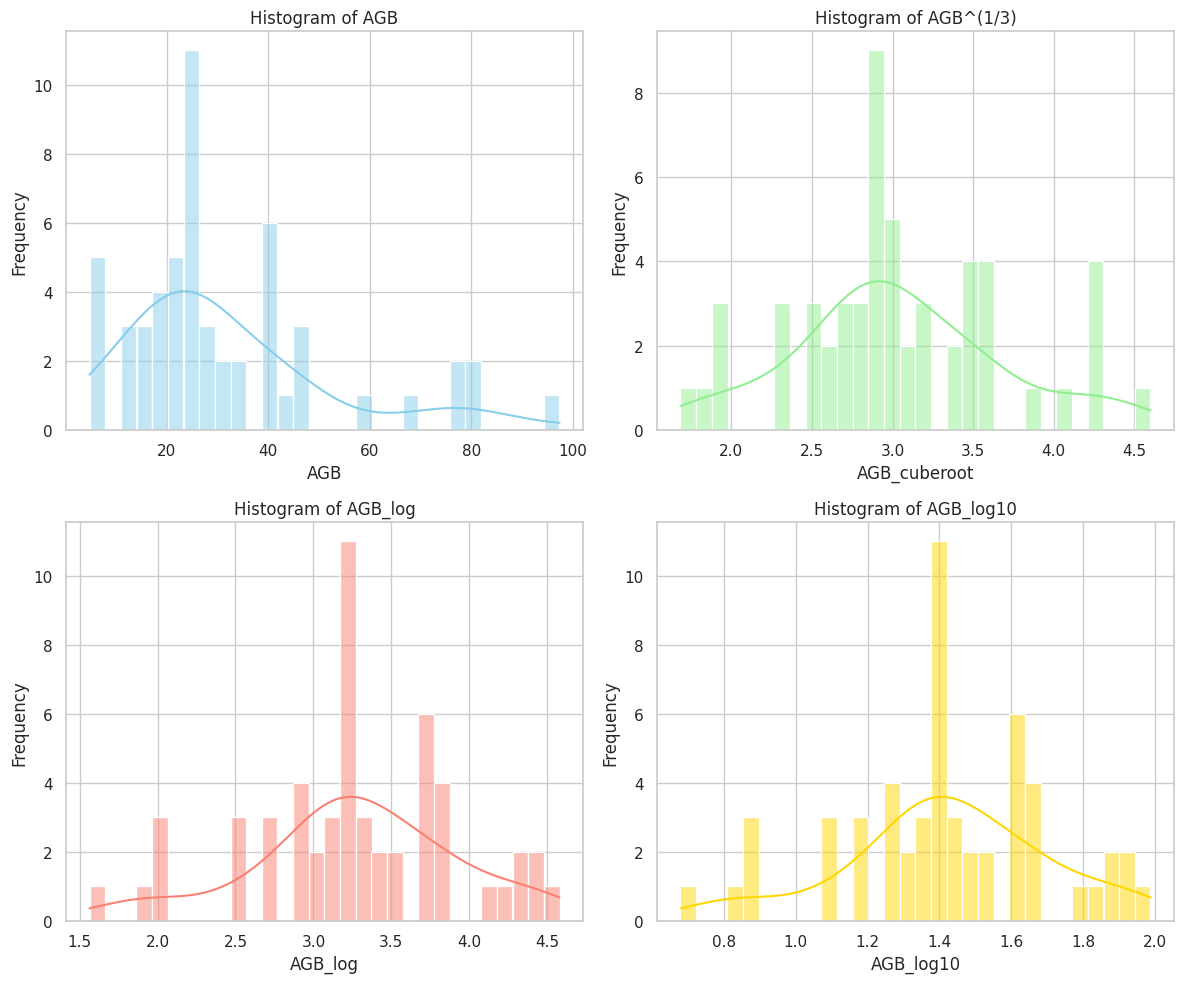

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# สร้าง figure และ subplots แบบ 2x2 (สำหรับ 4 กราฟ)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten() # ทำให้ axes เป็น array 1 มิติ เพื่อเข้าถึงง่ายขึ้น

# รายชื่อตัวแปรที่ต้องการ plot
variables_to_plot = ["AGB", "AGB_cuberoot", "AGB_log", "AGB_log10"]
titles = ["Histogram of AGB", "Histogram of AGB^(1/3)", "Histogram of AGB_log", "Histogram of AGB_log10"]
colors = ['skyblue', 'lightgreen', 'salmon', 'gold'] # กำหนดสีให้แต่ละกราฟ

# วาด Histogram สำหรับแต่ละตัวแปรใน subplot ที่แตกต่างกัน
for i, var in enumerate(variables_to_plot):
    sns.histplot(df[var], kde=True, ax=axes[i], color=colors[i], edgecolor='white', bins=30)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

plt.tight_layout() # ปรับระยะห่างระหว่าง subplots
plt.show()

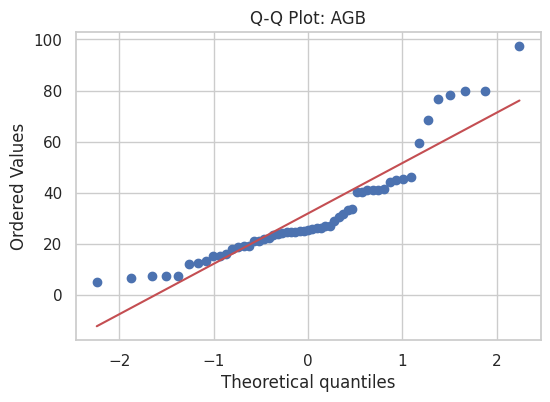

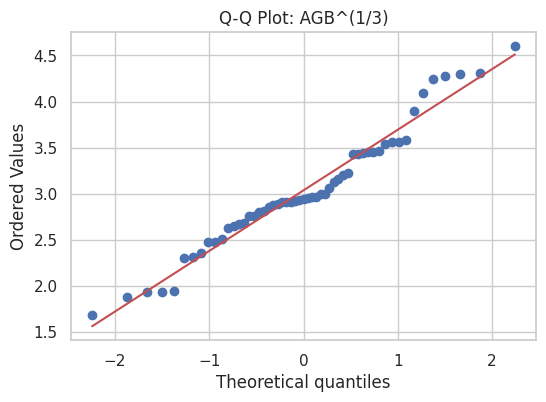

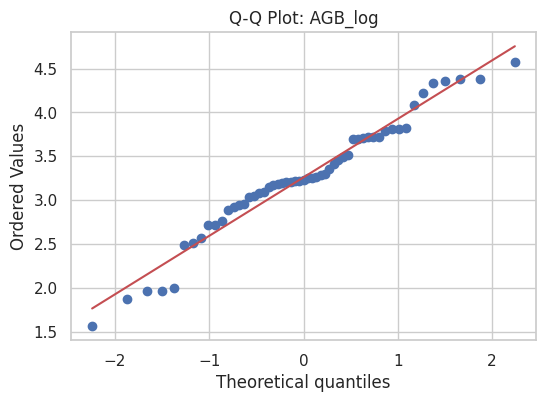

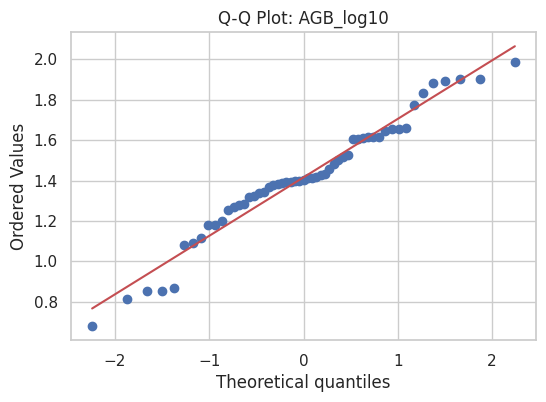

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Q-Q Plot for AGB
plt.figure(figsize=(6, 4))
stats.probplot(df["AGB"], dist="norm", plot=plt)
plt.title("Q-Q Plot: AGB")
plt.show()

# Q-Q Plot for AGB_cuberoot
plt.figure(figsize=(6, 4))
stats.probplot(df["AGB_cuberoot"], dist="norm", plot=plt)
plt.title("Q-Q Plot: AGB^(1/3)")
plt.show()

# Q-Q Plot for AGB_log
plt.figure(figsize=(6, 4))
stats.probplot(df["AGB_log"], dist="norm", plot=plt)
plt.title("Q-Q Plot: AGB_log")
plt.show()

# Q-Q Plot for AGB_log10
plt.figure(figsize=(6, 4))
stats.probplot(df["AGB_log10"], dist="norm", plot=plt)
plt.title("Q-Q Plot: AGB_log10")
plt.show()

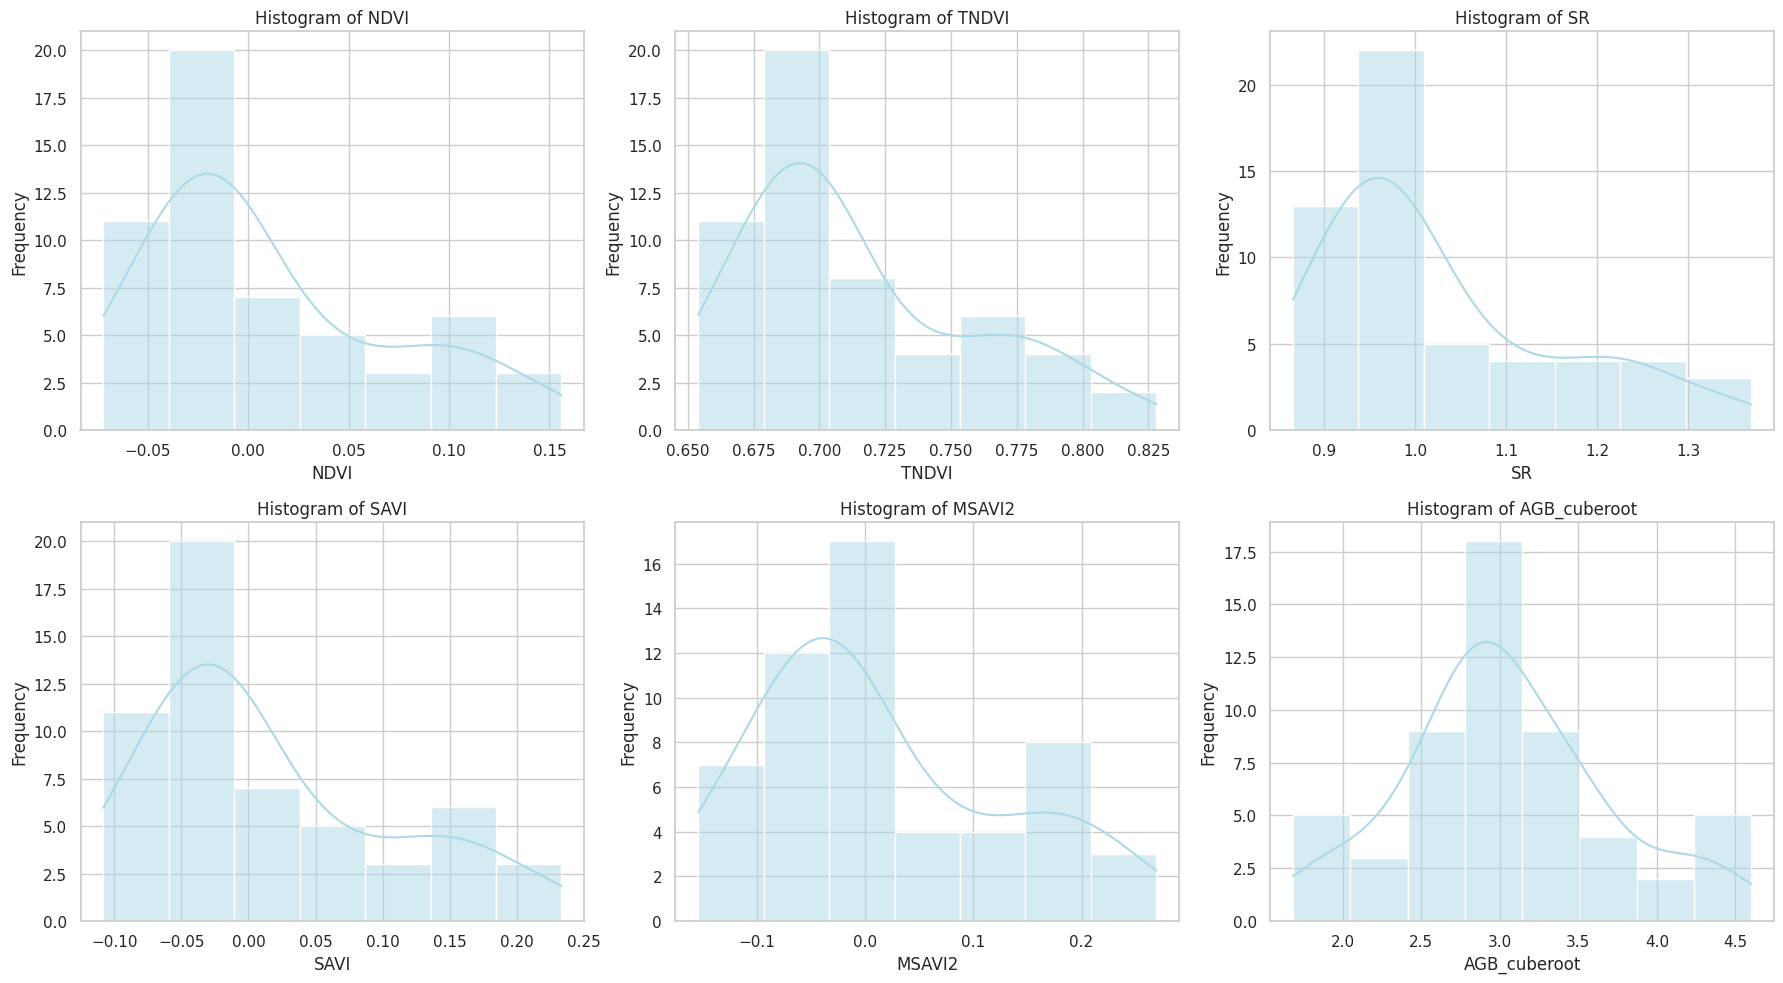

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Create figure with 2 rows and 3 columns for 6 variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

# List of variables: 5 independent + 1 transformed dependent
variables = ["NDVI", "TNDVI", "SR", "SAVI", "MSAVI2", "AGB_cuberoot"]

# Plot histogram with KDE for each variable
for i, var in enumerate(variables):
    sns.histplot(df[var], kde=True, ax=axes[i], color="lightblue", edgecolor="white")
    axes[i].set_title(f"Histogram of {var}")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# ตรวจสอบความสัมพันธ์ระหว่างตัวแปร (Correlation)

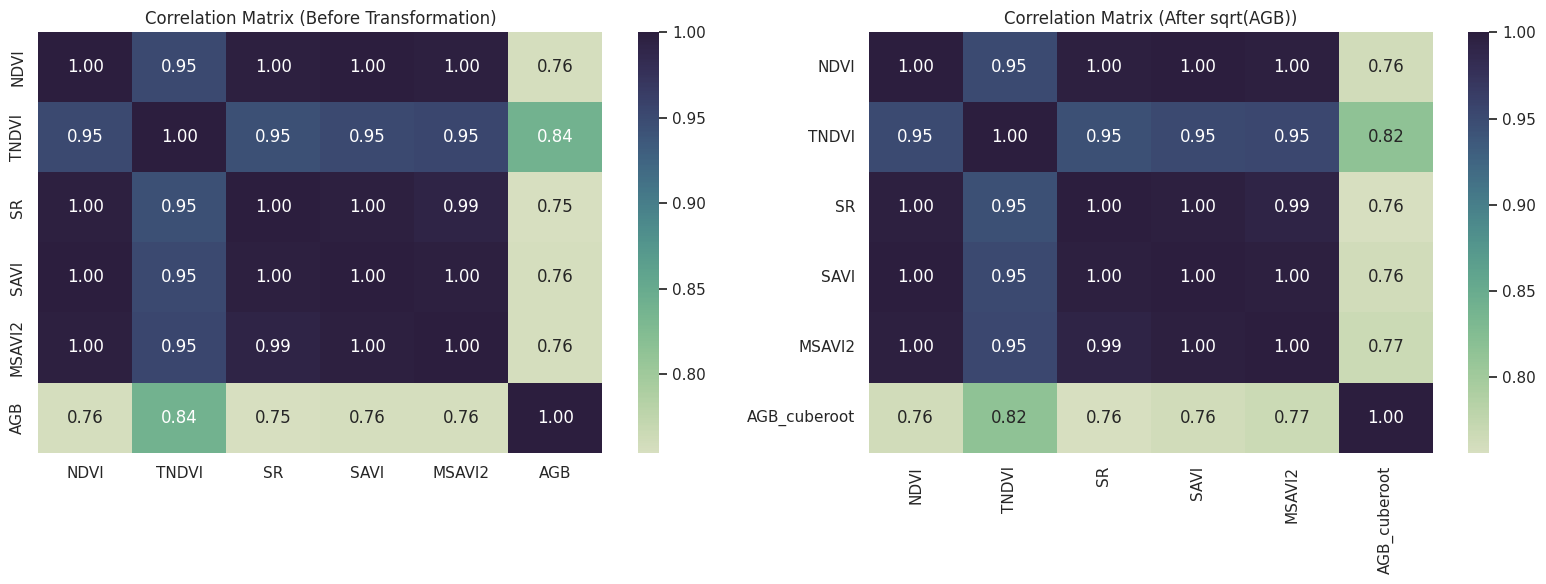

In [ ]:
# คำนวณ correlation matrix แบบแรก (ยังไม่แปลง)
corr_before = df[["NDVI", "TNDVI", "SR", "SAVI", "MSAVI2", "AGB"]].corr()

# คำนวณ correlation matrix แบบหลังแปลง
corr_after = df[["NDVI", "TNDVI", "SR", "SAVI", "MSAVI2", "AGB_cuberoot"]].corr()

# สร้างกราฟ Heatmap เปรียบเทียบ
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.heatmap(corr_before, annot=True, cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Matrix (Before Transformation)")

sns.heatmap(corr_after, annot=True, cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True), fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Matrix (After sqrt(AGB))")

plt.tight_layout()
plt.show()

**คำนวน matrix ค่าสัมประสิทธิ์สหสัมพันธ์ระหว่างตัวแปรต้นด้วยกันเอง**

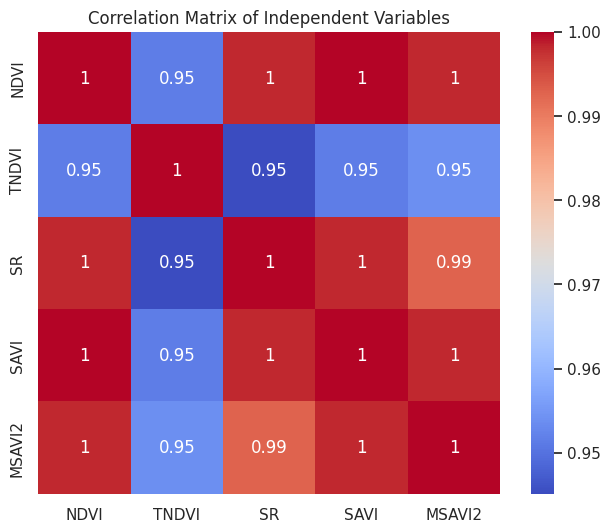

In [ ]:
# เลือกเฉพาะตัวแ variableต้น
X = df[["NDVI", "TNDVI", "SR", "SAVI", "MSAVI2"]]

# คำนวณ correlation matrix
corr_matrix = X.corr()

# วาด heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Independent Variables")
plt.show()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# เลือกตัวแปรต้น (เปลี่ยนชื่อให้ตรงกับตัวแปรจริงของคุณ)
X = df[['NDVI', 'TNDVI', 'SR', 'SAVI', 'MSAVI2']]
X = add_constant(X)

# สร้างตาราง VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data.round(2))

  Variable        VIF
0    const  304266.60
1     NDVI   33956.59
2    TNDVI      11.31
3       SR    5011.63
4     SAVI   38692.64
5   MSAVI2    5331.09


# สร้าง Model Linear regression ด้วยวิธี stepwise regression เพื่อเลืกตัวแปรที่เหมาะสม #


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# แยกตัวแปรต้น (X) และตัวแปรตามที่แปลงแล้ว (y)
X = df[['NDVI', 'TNDVI', 'SR', 'SAVI', 'MSAVI2']]
y = df["AGB_cuberoot"]  # ตัวแปรตามที่แปลง

# แบ่ง train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stepwise: Forward + Backward
sfs = SFS(LinearRegression(),
          k_features='best', forward=True, floating=True, scoring='r2', cv=5)
sfs.fit(X_train, y_train)

# แสดงตัวแ variable ที่ถูกเลือก
selected_features = list(sfs.k_feature_names_) # Corrected attribute name
print("ตัวแปรที่ถูกเลือกโดย Stepwise Regression:", selected_features)

ตัวแปรที่ถูกเลือกโดย Stepwise Regression: ['TNDVI']


In [ ]:
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # Import necessary metrics

# ใช้ข้อมูล Train Set สำหรับฝึกโมเดล
X_train_selected = X_train[['TNDVI']] # Make sure X_train and y_train are available from previous cells
model = sm.OLS(y_train, sm.add_constant(X_train_selected)).fit()
print(model.summary())

# ประเมิน R-squared บน Training Set
y_train_pred = model.predict(sm.add_constant(X_train_selected))
r2_train = r2_score(y_train, y_train_pred)
print(f"\nR2 Score (Training Set): {r2_train:.4f}")


# ประเมิน R-squared บน Test Set
X_test_selected = X_test[['TNDVI']] # Make sure X_test and y_test are available from previous cells
y_test_pred = model.predict(sm.add_constant(X_test_selected))
r2_test = r2_score(y_test, y_test_pred)
print(f"R2 Score (Test Set): {r2_test:.4f}")

# คำนวณและแสดงค่า RMSE, MSE, และ MAE บน Test Set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"RMSE (Test Set): {rmse_test:.4f}")
print(f"MAE (Test Set): {mae_test:.4f}")

                            OLS Regression Results                            
Dep. Variable:           AGB_cuberoot   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     75.70
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           6.03e-11
Time:                        19:42:39   Log-Likelihood:                -22.791
No. Observations:                  44   AIC:                             49.58
Df Residuals:                      42   BIC:                             53.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.7600      1.006     -5.724      0.0

In [ ]:
import statsmodels.api as sm

# ใช้ข้อมูล Train Set สำหรับฝึกโมเดล โดยใช้ตัวแปรต้นครบทุกตัว
# ตรวจสอบให้แน่ใจว่า X_train และ y_train พร้อมใช้งานจากเซลล์ก่อนหน้า
model_all = sm.OLS(y_train, sm.add_constant(X_train[['NDVI','TNDVI','SR','SAVI','MSAVI2']])).fit()
print(model_all.summary())

# ประเมิน R-squared บน Training Set
y_train_pred_all = model_all.predict(sm.add_constant(X_train[['NDVI','TNDVI','SR','SAVI','MSAVI2']]))
r2_train_all = r2_score(y_train, y_train_pred_all)
print(f"\nR2 Score (Training Set - All Features): {r2_train_all:.4f}")

# ประเมิน R-squared บน Test Set
# ตรวจสอบให้แน่ใจว่า X_test และ y_test พร้อมใช้งานจากเซลล์ก่อนหน้า
y_test_pred_all = model_all.predict(sm.add_constant(X_test[['NDVI','TNDVI','SR','SAVI','MSAVI2']]))
r2_test_all = r2_score(y_test, y_test_pred_all)
print(f"R2 Score (Test Set - All Features): {r2_test_all:.4f}")

# คำนวณและแสดงค่า RMSE, MSE, และ MAE บน Test Set
rmse_test_all = np.sqrt(mean_squared_error(y_test, y_test_pred_all))
mae_test_all = mean_absolute_error(y_test, y_test_pred_all)
print(f"RMSE (Test Set - All Features): {rmse_test_all:.4f}")
print(f"MAE (Test Set - All Features): {mae_test_all:.4f}")

                            OLS Regression Results                            
Dep. Variable:           AGB_cuberoot   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     16.90
Date:                Thu, 31 Jul 2025   Prob (F-statistic):           8.94e-09
Time:                        19:42:39   Log-Likelihood:                -19.714
No. Observations:                  44   AIC:                             51.43
Df Residuals:                      38   BIC:                             62.13
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -66.4925     31.956     -2.081      0.0

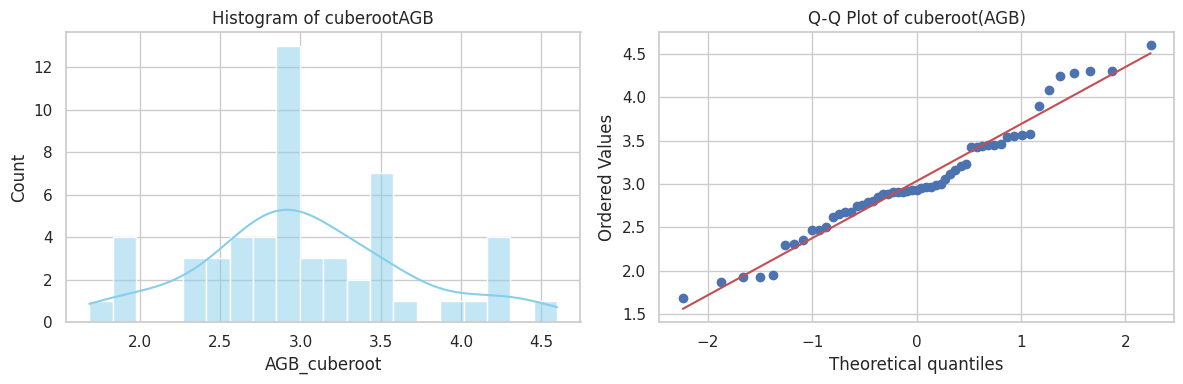

In [ ]:
# Histogram
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['AGB_cuberoot'], kde=True, color='skyblue', bins=20)
plt.title('Histogram of cuberootAGB')
plt.xlabel('AGB_cuberoot')

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(df['AGB_cuberoot'], dist="norm", plot=plt)
plt.title('Q-Q Plot of cuberoot(AGB)')

plt.tight_layout()
plt.show()

In [ ]:
import scipy.stats as stats

shapiro_test = stats.shapiro(df['AGB_cuberoot'])
print(f'Shapiro-Wilk Test statistic = {shapiro_test.statistic:.4f}, p-value = {shapiro_test.pvalue:.4f}')

Shapiro-Wilk Test statistic = 0.9670, p-value = 0.1341


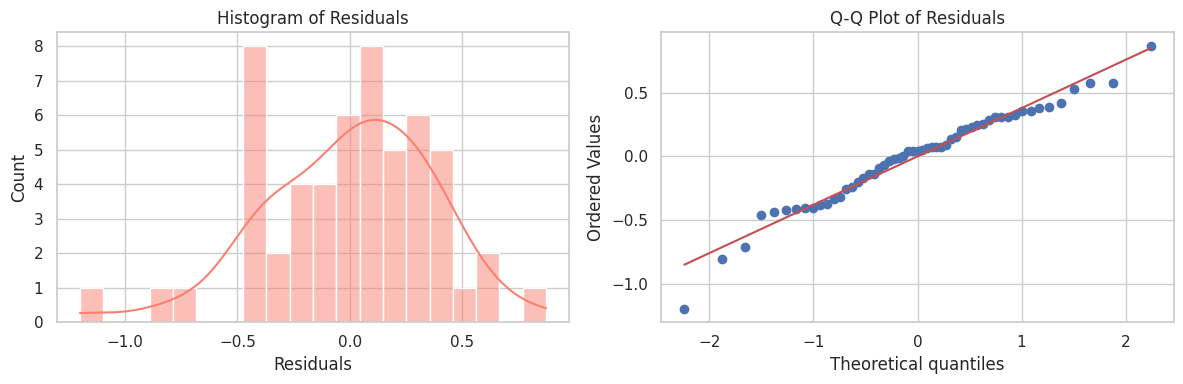

In [ ]:
# สร้างโมเดลจาก TNDVI
X = sm.add_constant(df[['TNDVI']])
y = df['AGB_cuberoot']
model = sm.OLS(y, X).fit()

# คำนวณ residuals
residuals = model.resid

# Histogram และ Q-Q Plot
plt.figure(figsize=(12, 4))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True, color='salmon', bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()

In [ ]:
shapiro_test_resid = stats.shapiro(residuals)
print(f'Shapiro-Wilk Test statistic = {shapiro_test_resid.statistic:.4f}, p-value = {shapiro_test_resid.pvalue:.4f}')

Shapiro-Wilk Test statistic = 0.9728, p-value = 0.2452


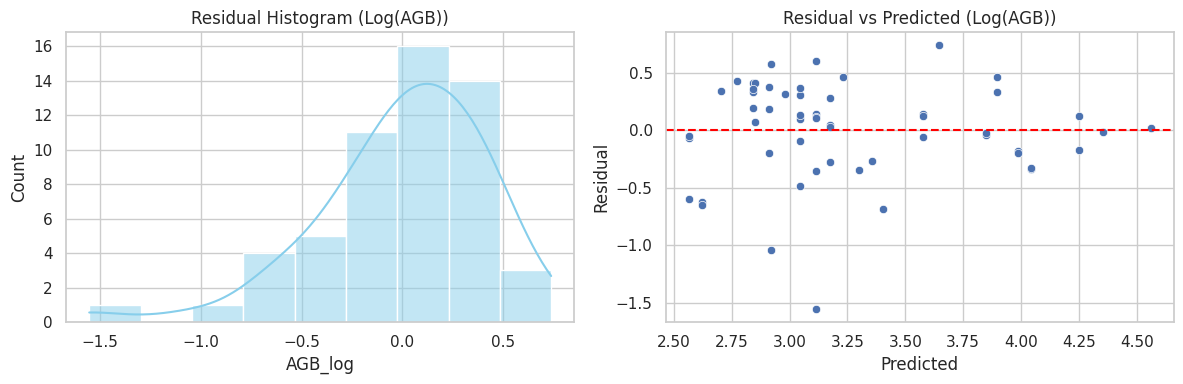

== Log(AGB) ==
Shapiro-Wilk Test: W = 0.9301, p = 0.0033
ไม่ผ่าน (Residuals distribution is NOT normal)



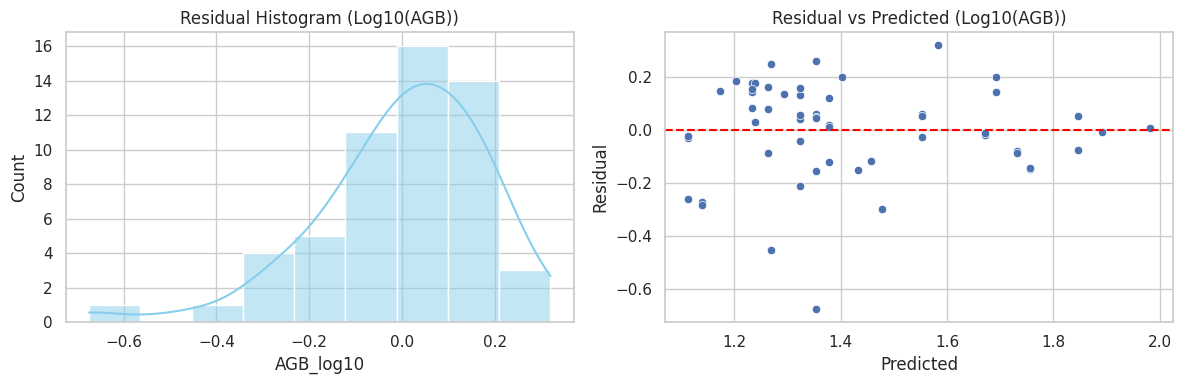

== Log10(AGB) ==
Shapiro-Wilk Test: W = 0.9301, p = 0.0033
ไม่ผ่าน (Residuals distribution is NOT normal)



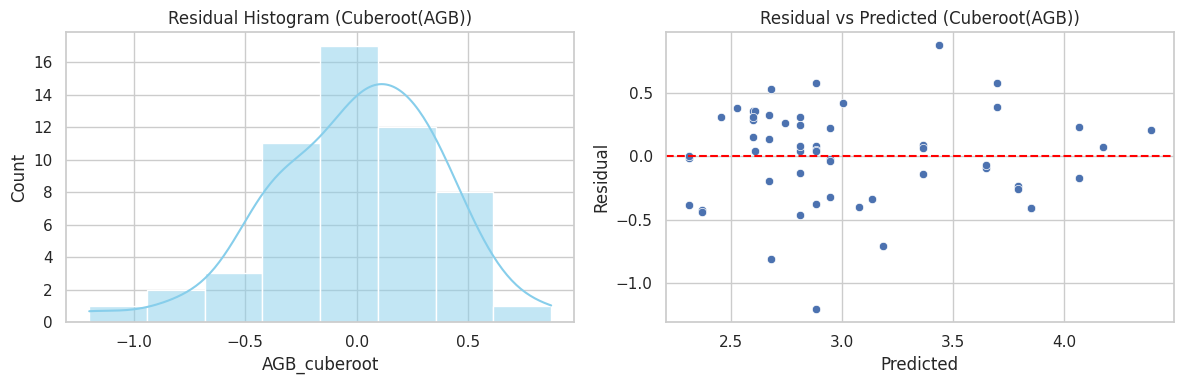

== Cuberoot(AGB) ==
Shapiro-Wilk Test: W = 0.9728, p = 0.2452
ผ่าน (Residuals distribution is likely normal)



In [ ]:
def check_residuals(X, y, label):
    model = LinearRegression()
    model.fit(X, y)
    predictions = model.predict(X)
    residuals = y - predictions
    stat, p_value = shapiro(residuals)

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(residuals, kde=True, color='skyblue')
    plt.title(f'Residual Histogram ({label})')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=predictions, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title(f'Residual vs Predicted ({label})')
    plt.xlabel('Predicted')
    plt.ylabel('Residual')

    plt.tight_layout()
    plt.show()

    print(f'== {label} ==')
    print(f'Shapiro-Wilk Test: W = {stat:.4f}, p = {p_value:.4f}')
    if p_value > 0.05:
        print("ผ่าน (Residuals distribution is likely normal)\n")
    else:
        print("ไม่ผ่าน (Residuals distribution is NOT normal)\n")

# ตั้งค่า X = TNDVI
X = df[['TNDVI']]

# เรียกฟังก์ชันตรวจสอบ residuals
check_residuals(X, df['AGB_log'], 'Log(AGB)')
check_residuals(X, df['AGB_log10'], 'Log10(AGB)')
check_residuals(X, df['AGB_cuberoot'], 'Cuberoot(AGB)')

In [ ]:
from scipy.stats import ttest_1samp

# ทำ T-test บน residuals
t_statistic, p_value = ttest_1samp(residuals, 0)

print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

T-statistic: 0.0000
P-value: 1.0000


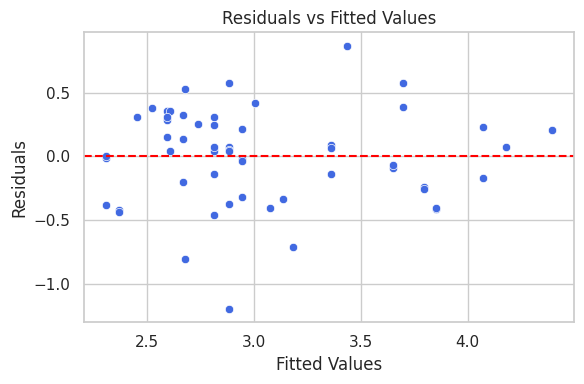

In [ ]:
# ดึงค่าที่จำเป็น
fitted_vals = model.fittedvalues
residuals = model.resid

# Scatter plot: Residuals vs Fitted values
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_vals, y=residuals, color='royalblue')
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan # Import the function
from statsmodels.tools.tools import add_constant # Import add_constant

# Add a constant to X
X = sm.add_constant(X)

# Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X)

# unpack ค่าที่ได้
bp_stat = bp_test[0]
bp_pvalue = bp_test[1] # Added closing bracket
print(f"Breusch-Pagan Test statistic = {bp_stat:.2f}, p-value = {bp_pvalue:.4f}")

Breusch-Pagan Test statistic = 0.07, p-value = 0.7918


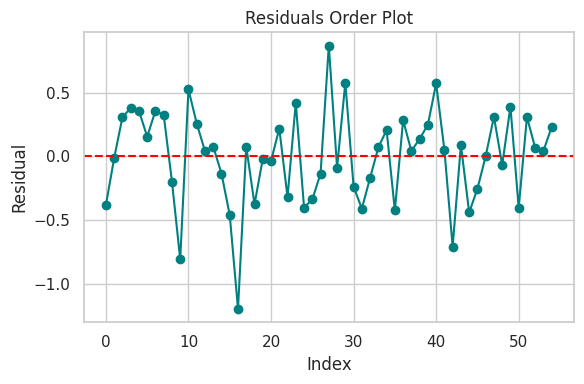

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(residuals.values, marker='o', linestyle='-', color='teal')
plt.title('Residuals Order Plot')
plt.xlabel('Index')
plt.ylabel('Residual')
plt.axhline(0, linestyle='--', color='red')
plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test
dw_stat = durbin_watson(residuals)
print(f'Durbin-Watson statistic: {dw_stat:.2f}, p-value: {1 - abs(dw_stat - 2):.4f}') # Approximation for p-value

Durbin-Watson statistic: 1.96, p-value: 0.9556


Linear Regression Model with Selected Feature (TNDVI)
R2 Score (Test Set): 0.7791
RMSE (Test Set): 0.1992
MAE (Test Set): 0.1512


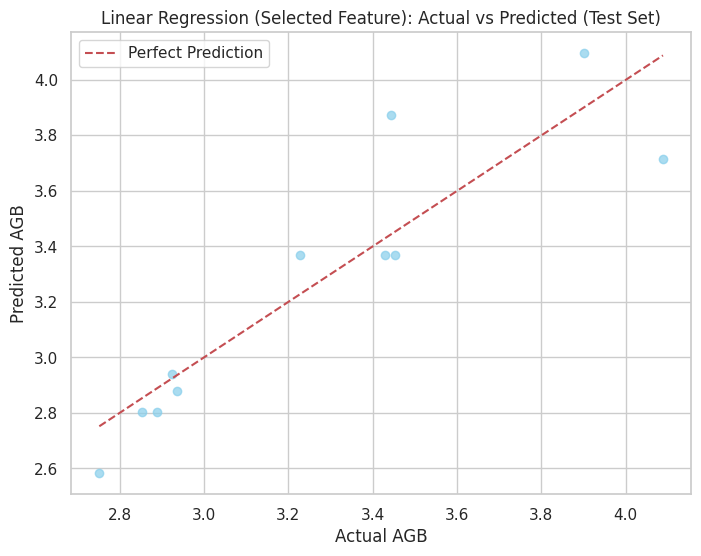

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np

# ใช้ตัวแปรต้นที่ถูกเลือกจาก Stepwise Regression ('TNDVI')
X_train_selected = X_train[['TNDVI']]
X_test_selected = X_test[['TNDVI']]

# สร้างและฝึกโมเดล Linear Regression
lin_model_selected = LinearRegression()
lin_model_selected.fit(X_train_selected, y_train)
lin_pred_selected = lin_model_selected.predict(X_test_selected)

# ประเมินผลโมเดลด้วยข้อมูล Test Set
lin_selected_r2 = r2_score(y_test, lin_pred_selected)
lin_selected_rmse = np.sqrt(mean_squared_error(y_test, lin_pred_selected))
lin_selected_mae = mean_absolute_error(y_test, lin_pred_selected)

print("Linear Regression Model with Selected Feature (TNDVI)")
print(f"R2 Score (Test Set): {lin_selected_r2:.4f}")
print(f"RMSE (Test Set): {lin_selected_rmse:.4f}")
print(f"MAE (Test Set): {lin_selected_mae:.4f}")

# กราฟเปรียบเทียบค่าจริง vs ค่าทำนายใน Test Set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lin_pred_selected, color='skyblue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB")
plt.title("Linear Regression (Selected Feature): Actual vs Predicted (Test Set)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# ทำนายค่า AGB_cuberoot จากโมเดล linear regression ที่ฝึกไว้ (โมเดลจาก statsmodels ที่ใช้แค่ TNDVI จากเซลล์ VGBtUkwNKLb0)
# ต้องใช้ข้อมูล Test Set ที่มีเฉพาะ TNDVI และเพิ่มค่าคงที่ เหมือนตอนฝึกโมเดล
X_test_selected_with_constant = sm.add_constant(X_test[['TNDVI']])
y_pred_cuberoot_test = model.predict(X_test_selected_with_constant)

# แปลงค่าทำนาย AGB_cuberoot กลับเป็นค่า AGB (ยกกำลัง 3)
y_pred_agb_test = y_pred_cuberoot_test ** 3

# ค่าจริง AGB จาก Test Set (y_test ตอนนี้คือ AGB_cuberoot ต้องแปลงกลับเป็น AGB เดิม)
y_true_agb_test = y_test ** 3

# สร้างตารางเปรียบเทียบ
compare_df_test = pd.DataFrame({
    'True_AGB': np.round(y_true_agb_test, 2),
    'Predicted_AGB': np.round(y_pred_agb_test, 2),
    'Difference': np.round(y_true_agb_test - y_pred_agb_test, 2)
})

# แสดงผล 10 แถวแรก (หรือทั้งหมดหาก Test Set มีน้อยกว่า 10 แถว)
print("Comparison of Actual vs Predicted AGB (Test Set)")
print(compare_df_test.head(10))

Comparison of Actual vs Predicted AGB (Test Set)
    True_AGB  Predicted_AGB  Difference
31     40.83          57.24      -16.41
5      20.84          17.50        3.34
32     59.33          67.40       -8.06
13     24.12          22.23        1.89
19     25.00          25.51       -0.51
49     68.33          50.58       17.75
41     25.30          23.98        1.32
26     33.62          38.03       -4.41
43     41.18          38.03        3.15
12     23.24          22.23        1.01


# Model Machine
เตรียมข้อมูล Train และ Test

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# เตรียมข้อมูล
X = df[['NDVI', 'TNDVI', 'SR', 'SAVI', 'MSAVI2']]
y = df['AGB']

# แบ่งข้อมูล train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Model Linear Regression ทาง Machine

Linear Regression
R2 Score:, 0.5347
RMSE:, 10.1389
MAE:, 6.4915


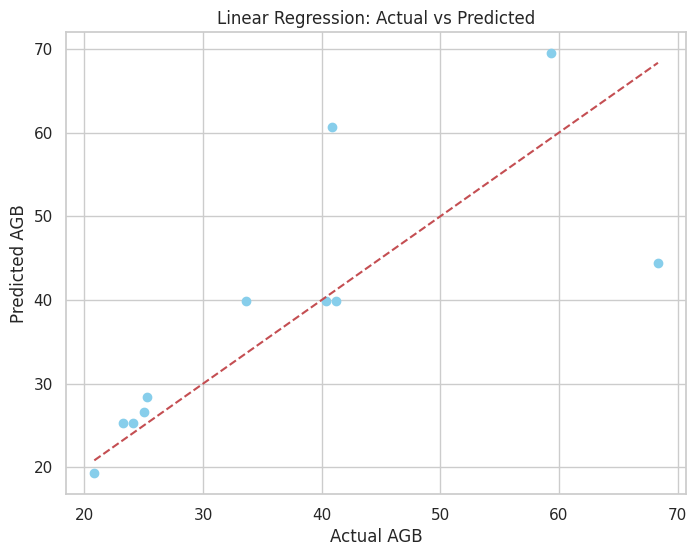

In [ ]:
from sklearn.linear_model import LinearRegression

# 🔧 สร้างโมเดลและทำนาย
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
lin_pred = lin_model.predict(X_test)

# 📊 ประเมินผล
lin_r2 = r2_score(y_test, lin_pred)
lin_rmse = np.sqrt(mean_squared_error(y_test, lin_pred))
lin_mae = mean_absolute_error(y_test, lin_pred)
print("Linear Regression")
print(f"R2 Score:, {lin_r2:.4f}")
print(f"RMSE:, {lin_rmse:.4f}")
print(f"MAE:, {lin_mae:.4f}")

# 📈 กราฟเปรียบเทียบ
plt.figure(figsize=(8, 6))
plt.scatter(y_test, lin_pred, color='skyblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB")
plt.title("Linear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

#2. Model Random Forest

Random Forest
R2 Score:, 0.0893
RMSE:, 14.1847
MAE:, 10.0080


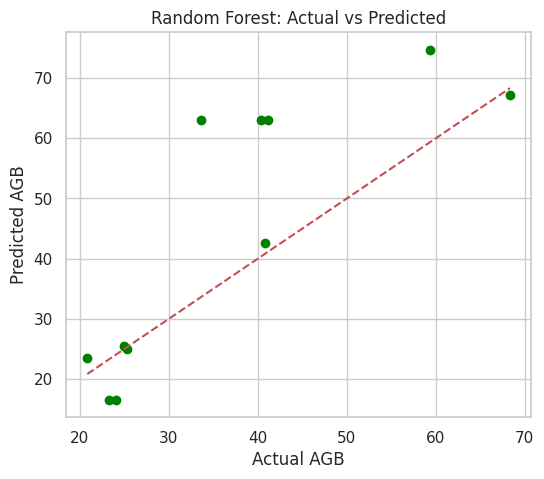

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 🔧 สร้างโมเดลและทำนาย
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# 📊 ประเมินผล
rf_r2 = r2_score(y_test, rf_pred)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
print("Random Forest")
print(f"R2 Score:, {rf_r2:.4f}")
print(f"RMSE:, {rf_rmse:.4f}")
print(f"MAE:, {rf_mae:.4f}")

# 📈 กราฟเปรียบเทียบ
plt.figure(figsize=(6, 5))
plt.scatter(y_test, rf_pred, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.show()

# 3. Model Support Vector Regression (SVR)

SVR
R2 Score:, -0.2563
RMSE:, 16.6601
MAE:, 11.1996


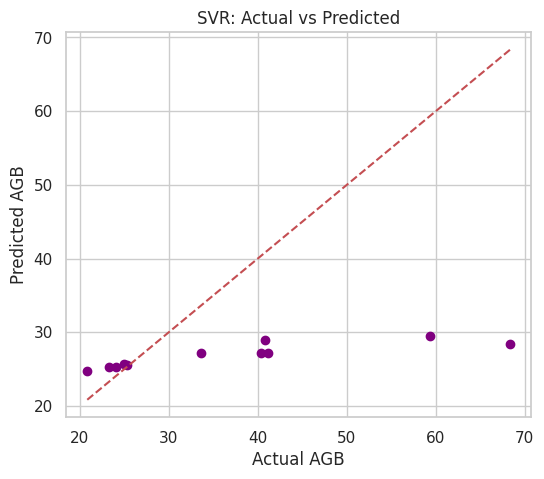

In [ ]:
from sklearn.svm import SVR

# 🔧 สร้างโมเดลและทำนาย
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

# 📊 ประเมินผล
svr_r2 = r2_score(y_test, svr_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test, svr_pred))
svr_mae = mean_absolute_error(y_test, svr_pred)
print("SVR")
print(f"R2 Score:, {svr_r2:.4f}")
print(f"RMSE:, {svr_rmse:.4f}")
print(f"MAE:, {svr_mae:.4f}")

# 📈 กราฟเปรียบเทียบ
plt.figure(figsize=(6, 5))
plt.scatter(y_test, svr_pred, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB")
plt.title("SVR: Actual vs Predicted")
plt.grid(True)
plt.show()

# 4. Model K-Nearest Neighbors (KNN)

KNN
R2 Score:, 0.7370
RMSE:, 7.6227
MAE:, 5.5679


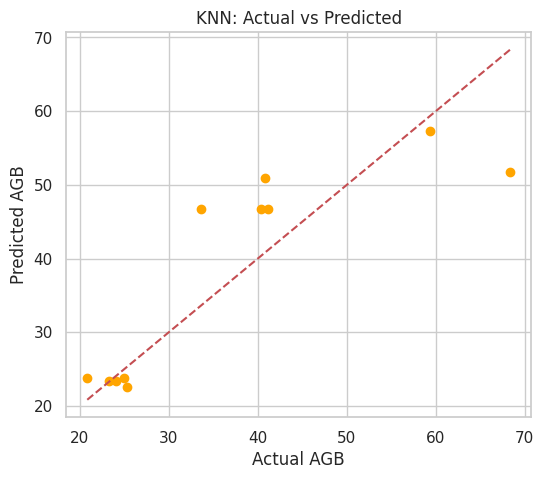

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# 🔧 สร้างโมเดลและทำนาย
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# 📊 ประเมินผล
knn_r2 = r2_score(y_test, knn_pred)
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_pred))
knn_mae = mean_absolute_error(y_test, knn_pred)
print("KNN")
print(f"R2 Score:, {knn_r2:.4f}")
print(f"RMSE:, {knn_rmse:.4f}")
print(f"MAE:, {knn_mae:.4f}")

# 📈 กราฟเปรียบเทียบ
plt.figure(figsize=(6, 5))
plt.scatter(y_test, knn_pred, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB")
plt.title("KNN: Actual vs Predicted")
plt.grid(True)
plt.show()

#5. Model Decision Tree

Decision Tree
R2 Score:, -1.4500
RMSE:, 23.2657
MAE:, 16.4329


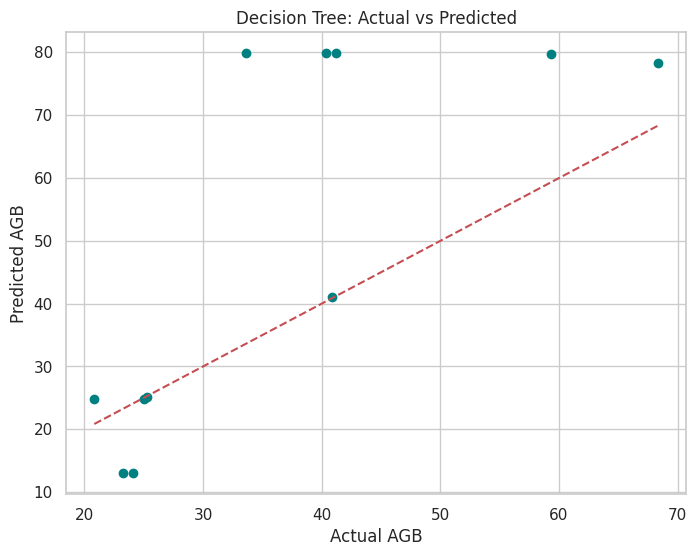

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# 🔧 สร้างโมเดลและทำนาย
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# 📊 ประเมินผล
dt_r2 = r2_score(y_test, dt_pred)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_mae = mean_absolute_error(y_test, dt_pred)
print("Decision Tree")
print(f"R2 Score:, {dt_r2:.4f}")
print(f"RMSE:, {dt_rmse:.4f}")
print(f"MAE:, {dt_mae:.4f}")

# 📈 กราฟเปรียบเทียบ
plt.figure(figsize=(8, 6))
plt.scatter(y_test, dt_pred, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB")
plt.title("Decision Tree: Actual vs Predicted")
plt.grid(True)
plt.show()

#6. Model XGBoost

XGBoost Regressor
R2 Score:, -1.4495
RMSE:, 23.2637
MAE:, 16.4313


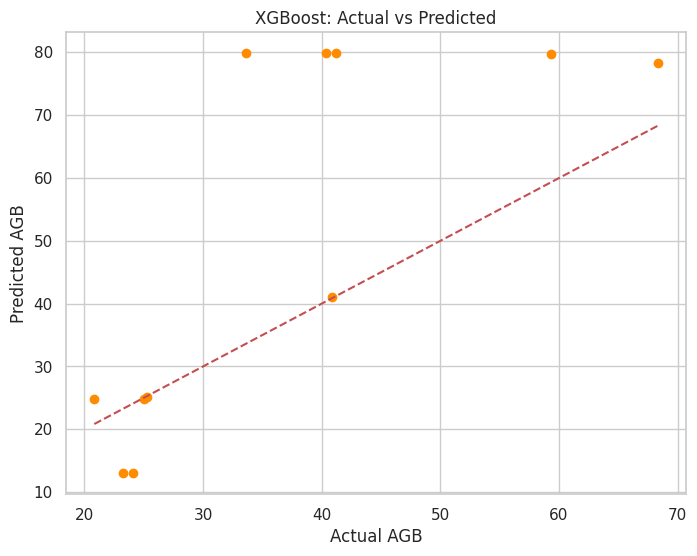

In [ ]:
from xgboost import XGBRegressor

# 🔧 สร้างโมเดลและทำนาย
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# 📊 ประเมินผล
xgb_r2 = r2_score(y_test, xgb_pred)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_mae = mean_absolute_error(y_test, xgb_pred)

print("XGBoost Regressor")
print(f"R2 Score:, {xgb_r2:.4f}")
print(f"RMSE:, {xgb_rmse:.4f}")
print(f"MAE:, {xgb_mae:.4f}")

# 📈 กราฟเปรียบเทียบ
plt.figure(figsize=(8, 6))
plt.scatter(y_test, xgb_pred, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB")
plt.title("XGBoost: Actual vs Predicted")
plt.grid(True)
plt.show()

#7. Model GradientBoosting

Gradient Boosting Regressor
R2 Score:, -1.2711
RMSE:, 22.4003
MAE:, 15.6554


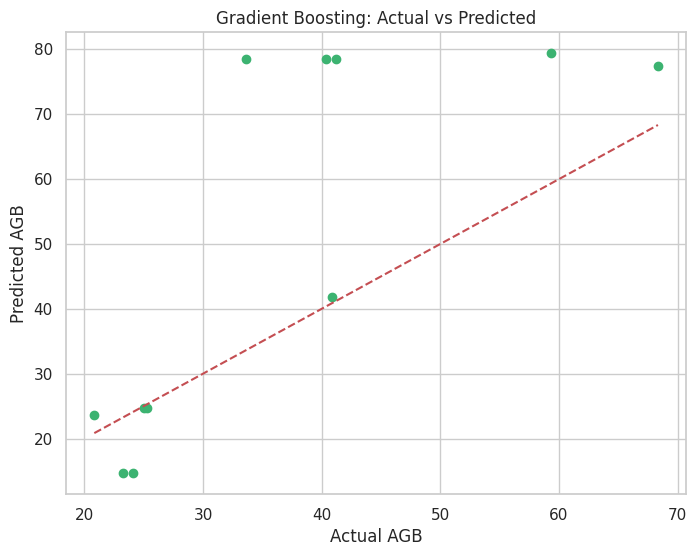

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# 🔧 สร้างโมเดลและทำนาย
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)

# 📊 ประเมินผล
gbr_r2 = r2_score(y_test, gbr_pred)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_pred))
gbr_mae = mean_absolute_error(y_test, gbr_pred)

print("Gradient Boosting Regressor")
print(f"R2 Score:, {gbr_r2:.4f}")
print(f"RMSE:, {gbr_rmse:.4f}")
print(f"MAE:, {gbr_mae:.4f}")

# 📈 กราฟเปรียบเทียบ
plt.figure(figsize=(8, 6))
plt.scatter(y_test, gbr_pred, color='mediumseagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.grid(True)
plt.show()

In [ ]:
# Function to calculate MAPE in percentage
def calculate_mape_percentage(y_true, y_pred):
    # Avoid division by zero for actual values close to zero
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    # Use a small epsilon to avoid division by zero if actual value is 0
    # Or filter out data points where y_true is 0 if appropriate for your data
    mape = np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100
    return mape

# Need to calculate predictions for all models on the test set again
# as some prediction variables might not be available if cells were not run in order

# Prepare data for regression models (using original AGB as target)
X = df[['NDVI', 'TNDVI', 'SR', 'SAVI', 'MSAVI2']]
y = df['AGB']

# Split data (ensure this split is consistent with previous model training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Re-train models to ensure predictions are available for MAPE calculation
# Linear Regression (TNDVI) - Need to use the transformed AGB for training
# But calculate MAPE on original AGB for consistency in comparison table with other models
X_train_tndvi = X_train[['TNDVI']]
y_train_cuberoot = np.cbrt(y_train) # Use transformed y for training this specific model

lin_model_tndvi_transformed = LinearRegression()
lin_model_tndvi_transformed.fit(X_train_tndvi, y_train_cuberoot)
# Predict transformed values on test set
lin_pred_tndvi_cuberoot = lin_model_tndvi_transformed.predict(X_test[['TNDVI']])
# Transform predictions back to original scale for MAPE calculation
lin_pred_tndvi_original = lin_pred_tndvi_cuberoot ** 3

# Linear Regression (all features) - Using original AGB for training
lin_model_all = LinearRegression()
lin_model_all.fit(X_train, y_train)
lin_pred_all = lin_model_all.predict(X_test)


# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

# KNN
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Gradient Boosting
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)
gbr_pred = gbr_model.predict(X_test)

# Calculate metrics for each model using the original y_test (AGB)
model_results = []

# Define a helper function for adding results (without conclusion for now)
def add_result(model_name, y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    mape = calculate_mape_percentage(y_true, y_pred)

    model_results.append([
        model_name,
        r2,
        rmse,
        mae,
        mape
    ])


# Add results for each model (excluding Ridge, Lasso, Elastic Net for now)
add_result('Linear Regression (TNDVI)', y_test, lin_pred_tndvi_original)
add_result('Linear Regression (all features)', y_test, lin_pred_all)
add_result('Random Forest', y_test, rf_pred)
add_result('SVR', y_test, svr_pred)
add_result('KNN', y_test, knn_pred)
add_result('Decision Tree', y_test, dt_pred)
add_result('XGBoost', y_test, xgb_pred)
add_result('Gradient Boosting', y_test, gbr_pred)


# 📊 สร้าง DataFrame
df_results = pd.DataFrame(model_results, columns=['Model', 'R2 Score', 'RMSE', 'MAE', 'MAPE (%)'])

# Format the columns for better readability
df_results['R2 Score'] = df_results['R2 Score'].map('{:.4f}'.format)
df_results['RMSE'] = df_results['RMSE'].map('{:.4f}'.format)
df_results['MAE'] = df_results['MAE'].map('{:.4f}'.format)
df_results['MAPE (%)'] = df_results['MAPE (%)'].map('{:.2f}%'.format)


print(df_results)

                              Model R2 Score     RMSE      MAE MAPE (%)
0         Linear Regression (TNDVI)   0.6973   8.1780   5.6508   13.43%
1  Linear Regression (all features)   0.5347  10.1389   6.4915   14.85%
2                     Random Forest   0.0893  14.1847  10.0080   27.73%
3                               SVR  -0.2563  16.6601  11.1996   23.59%
4                               KNN   0.7370   7.6227   5.5679   13.95%
5                     Decision Tree  -1.4500  23.2657  16.4329   44.52%
6                           XGBoost  -1.4495  23.2637  16.4313   44.52%
7                 Gradient Boosting  -1.2711  22.4003  15.6554   41.92%


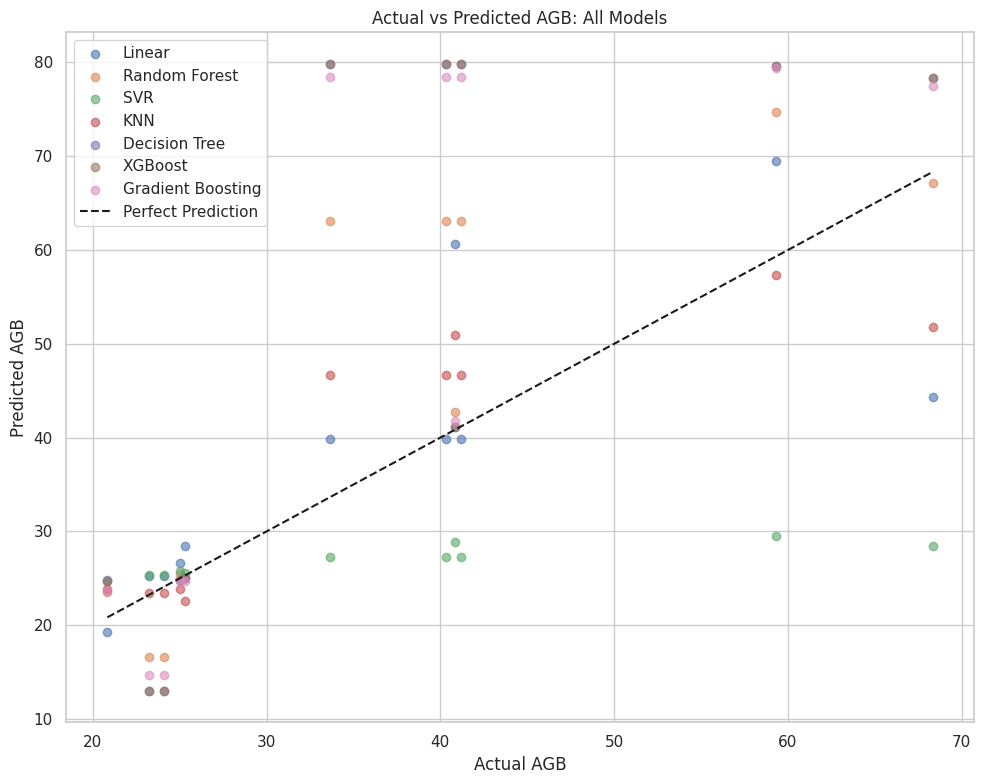

In [ ]:
# 📌 สร้างกราฟเปรียบเทียบค่าจริงกับค่าทำนายของทุกโมเดล
plt.figure(figsize=(10, 8))

# 🔹 วาดกราฟ scatter ของแต่ละโมเดล (เปรียบเทียบ y_test กับ predicted)
plt.scatter(y_test, lin_pred, label="Linear", alpha=0.6)
plt.scatter(y_test, rf_pred, label="Random Forest", alpha=0.6)
plt.scatter(y_test, svr_pred, label="SVR", alpha=0.6)
plt.scatter(y_test, knn_pred, label="KNN", alpha=0.6)
plt.scatter(y_test, dt_pred, label="Decision Tree", alpha=0.6)
plt.scatter(y_test, xgb_pred, label="XGBoost", alpha=0.6)
plt.scatter(y_test, gbr_pred, label="Gradient Boosting", alpha=0.6)

# 🔸 เส้นทำนายตรงเป๊ะ (เส้นสีแดง)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label="Perfect Prediction")

# 🎨 ตั้งค่ากราฟ
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB")
plt.title("Actual vs Predicted AGB: All Models")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

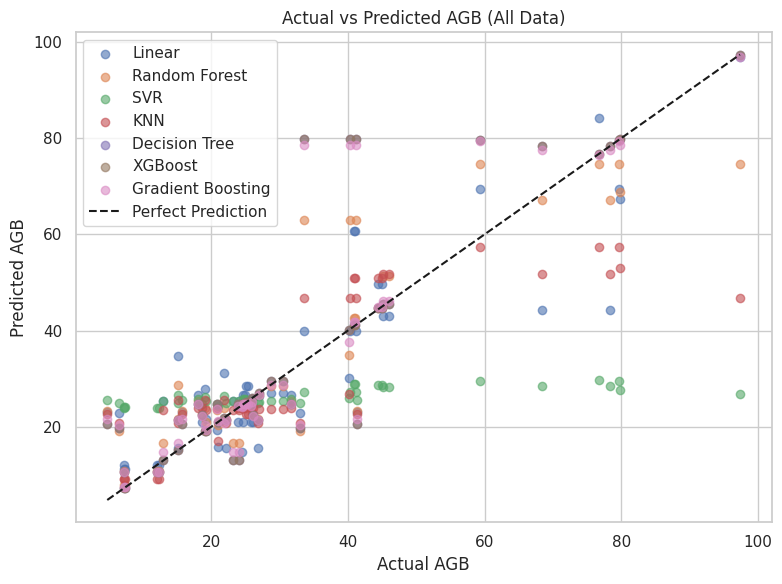

In [ ]:
# Combine train and test sets for actual values
# Use pd.concat instead of the deprecated append method for Series
y_all = pd.concat([y_train, y_test])
y_all = y_all.sort_index() # Sort to match the order of original df

# Predict on both train and test sets and combine
lin_all_pred = np.append(lin_model.predict(X_train), lin_model.predict(X_test))
rf_all_pred = np.append(rf_model.predict(X_train), rf_model.predict(X_test))
svr_all_pred = np.append(svr_model.predict(X_train), svr_model.predict(X_test))
knn_all_pred = np.append(knn_model.predict(X_train), knn_model.predict(X_test))
dt_all_pred = np.append(dt_model.predict(X_train), dt_model.predict(X_test))
xgb_all_pred = np.append(xgb_model.predict(X_train), xgb_model.predict(X_test))
gbr_all_pred = np.append(gbr_model.predict(X_train), gbr_model.predict(X_test))


# Sort predictions to match the order of y_all (based on original index)
# This is important because the append order is based on the split
train_indices = X_train.index
test_indices = X_test.index

all_indices = np.append(train_indices.values, test_indices.values)
sort_order = np.argsort(all_indices)

lin_all_pred_sorted = lin_all_pred[sort_order]
rf_all_pred_sorted = rf_all_pred[sort_order]
svr_all_pred_sorted = svr_all_pred[sort_order]
knn_all_pred_sorted = knn_all_pred[sort_order]
dt_all_pred_sorted = dt_all_pred[sort_order]
xgb_all_pred_sorted = xgb_all_pred[sort_order]
gbr_all_pred_sorted = gbr_all_pred[sort_order]


# 📊 สร้างกราฟเปรียบเทียบค่าจริงกับค่าทำนาย (All Data)
plt.figure(figsize=(8, 6))

plt.scatter(y_all, lin_all_pred_sorted, label="Linear", alpha=0.6)
plt.scatter(y_all, rf_all_pred_sorted, label="Random Forest", alpha=0.6)
plt.scatter(y_all, svr_all_pred_sorted, label="SVR", alpha=0.6)
plt.scatter(y_all, knn_all_pred_sorted, label="KNN", alpha=0.6)
plt.scatter(y_all, dt_all_pred_sorted, label="Decision Tree", alpha=0.6)
plt.scatter(y_all, xgb_all_pred_sorted, label="XGBoost", alpha=0.6)
plt.scatter(y_all, gbr_all_pred_sorted, label="Gradient Boosting", alpha=0.6)

# 🔸 เส้นสมมติว่าโมเดลทำนายตรงเป๊ะ
plt.plot([y_all.min(), y_all.max()], [y_all.min(), y_all.max()], 'k--', label="Perfect Prediction")

# 🎨 ตั้งค่ากราฟ
plt.xlabel("Actual AGB")
plt.ylabel("Predicted AGB")
plt.title("Actual vs Predicted AGB (All Data)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 8. Models with Regularization (Ridge, Lasso, Elastic Net)

--- Ridge Regression ---
R2 Score: 0.7192
RMSE: 7.8772
MAE: 5.6622

--- Lasso Regression ---
R2 Score: 0.7210
RMSE: 7.8516
MAE: 5.6488

--- Elastic Net Regression ---
R2 Score: 0.5754
RMSE: 9.6860
MAE: 7.0003


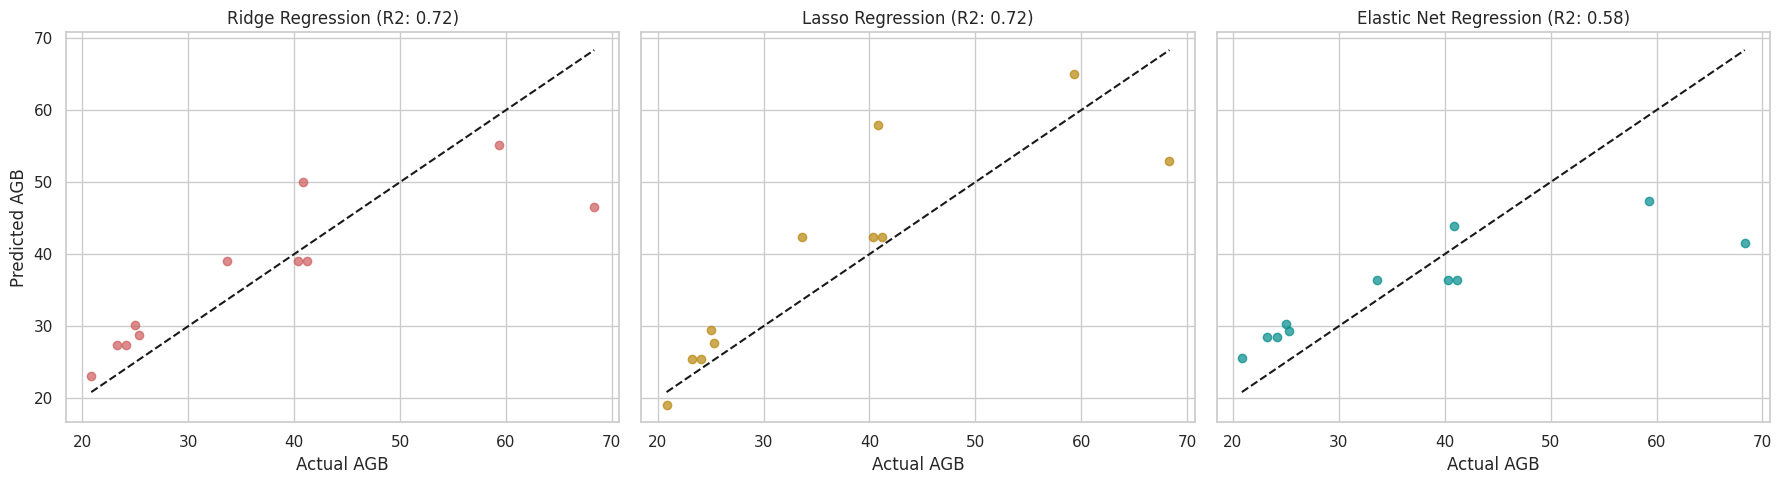

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# ใช้ตัวแปรต้นทั้ง 5 ตัว
X = df[['NDVI', 'TNDVI', 'SR', 'SAVI', 'MSAVI2']]
y = df['AGB']

# --- Ridge Regression ---
print("--- Ridge Regression ---")
# ค่า alpha เป็น parameter สำคัญที่ควบคุมความแรงของการทำ Regularization
# ค่า alpha = 0 จะเหมือน Linear Regression ปกติ
# ควรใช้ GridSearchCV เพื่อหาค่า alpha ที่เหมาะสมที่สุด
ridge_model = Ridge(alpha=1.0) # ค่า alpha เริ่มต้น
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

ridge_r2 = r2_score(y_test, ridge_pred)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_mae = mean_absolute_error(y_test, ridge_pred)

print(f"R2 Score: {ridge_r2:.4f}")
print(f"RMSE: {ridge_rmse:.4f}")
print(f"MAE: {ridge_mae:.4f}")

# --- Lasso Regression ---
print("\n--- Lasso Regression ---")
# ค่า alpha เป็น parameter สำคัญเช่นกัน
lasso_model = Lasso(alpha=0.1) # ค่า alpha เริ่มต้น
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

lasso_r2 = r2_score(y_test, lasso_pred)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_mae = mean_absolute_error(y_test, lasso_pred)

print(f"R2 Score: {lasso_r2:.4f}")
print(f"RMSE: {lasso_rmse:.4f}")
print(f"MAE: {lasso_mae:.4f}")

# --- Elastic Net Regression ---
print("\n--- Elastic Net Regression ---")
# มีสอง parameters คือ alpha และ l1_ratio
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5) # ค่า alpha และ l1_ratio เริ่มต้น
elastic_model.fit(X_train, y_train)
elastic_pred = elastic_model.predict(X_test)

elastic_r2 = r2_score(y_test, elastic_pred)
elastic_rmse = np.sqrt(mean_squared_error(y_test, elastic_pred))
elastic_mae = mean_absolute_error(y_test, elastic_pred)

print(f"R2 Score: {elastic_r2:.4f}")
print(f"RMSE: {elastic_rmse:.4f}")
print(f"MAE: {elastic_mae:.4f}")


# 📈 กราฟเปรียบเทียบค่าจริง vs ค่าทำนาย (สำหรับ Ridge, Lasso, Elastic Net)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Ridge
axes[0].scatter(y_test, ridge_pred, color='indianred', alpha=0.7)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[0].set_xlabel("Actual AGB")
axes[0].set_ylabel("Predicted AGB")
axes[0].set_title(f"Ridge Regression (R2: {ridge_r2:.2f})")
axes[0].grid(True)

# Lasso
axes[1].scatter(y_test, lasso_pred, color='darkgoldenrod', alpha=0.7)
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[1].set_xlabel("Actual AGB")
axes[1].set_title(f"Lasso Regression (R2: {lasso_r2:.2f})")
axes[1].grid(True)

# Elastic Net
axes[2].scatter(y_test, elastic_pred, color='darkcyan', alpha=0.7)
axes[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
axes[2].set_xlabel("Actual AGB")
axes[2].set_title(f"Elastic Net Regression (R2: {elastic_r2:.2f})")
axes[2].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

# สร้าง target variable แบบ categorical จาก AGB
# ในกรณีนี้ เราจะใช้ข้อมูลเดิม แต่สมมติว่า AGB เป็น categorical variable
# โดยแบ่งเป็น 2 class: 'Low' และ 'High'
# (ในความเป็นจริง AGB เป็น continuous variable การทำแบบนี้เป็นเพียงตัวอย่างสำหรับ SVM Classification)
df['AGB_Category'] = pd.cut(df['AGB'], bins=2, labels=['Low', 'High'])

# เตรียมข้อมูล X และ y สำหรับ Classification
X_clf = df[['NDVI', 'TNDVI', 'SR', 'SAVI', 'MSAVI2']]
y_clf = df['AGB_Category']

# แบ่งข้อมูล train/test สำหรับ Classification (ใช้ random_state เดียวกันเพื่อให้ผลลัพธ์ซ้ำเดิมได้)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# สร้างโมเดล SVM (SVC)
svm_model = SVC(kernel='linear', random_state=42) # ใช้ linear kernel เป็นตัวอย่าง

# ฝึกโมเดล
svm_model.fit(X_train_clf, y_train_clf)

# ทำนายผล
svm_pred_clf = svm_model.predict(X_test_clf)

# ประเมินผล
print("SVM (Support Vector Classifier)")
print(f"Accuracy Score: {accuracy_score(y_test_clf, svm_pred_clf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test_clf, svm_pred_clf))

SVM (Support Vector Classifier)
Accuracy Score: 0.8182

Classification Report:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00         2
         Low       0.82      1.00      0.90         9

    accuracy                           0.82        11
   macro avg       0.41      0.50      0.45        11
weighted avg       0.67      0.82      0.74        11



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
